### 데이터 로드

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:

data = pd.read_csv('../data/student-mat.csv', sep=';')
df = pd.DataFrame(data)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [20]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### 상관관계 시각화

In [21]:
# 숫자형이 아닌 속성들 확인
# 어떤 값들로 이루어져 있는진 사이트의 데이터 설명참조함 -> 모두 numeric으로 바꿀 수 있음
df.select_dtypes(include=['object']).nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
# 범주형 변수를 숫자형으로 변환
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


In [23]:
df[df.columns[15:]].head()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


### heatmap (scaling하기 전)

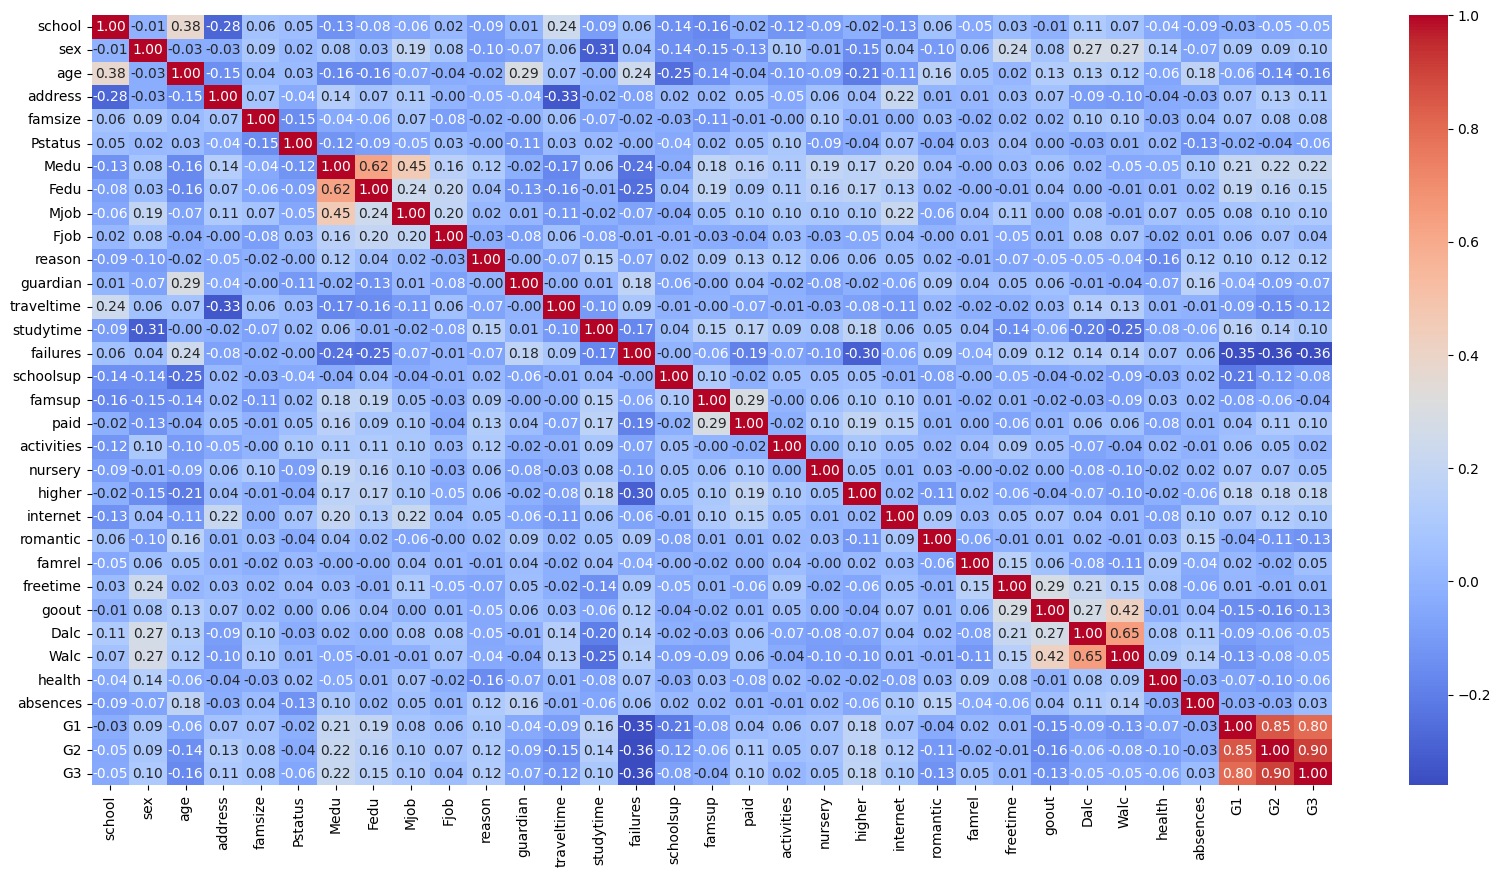

In [40]:
selected_cols = df.columns[:].tolist()
corr_matrix = df[selected_cols].corr()

plt.figure(figsize=(20,10))
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

0     5.666667
1     5.333333
2     8.333333
3    14.666667
4     8.666667
dtype: float64


Text(0.5, 1.0, 'Gs Distribution')

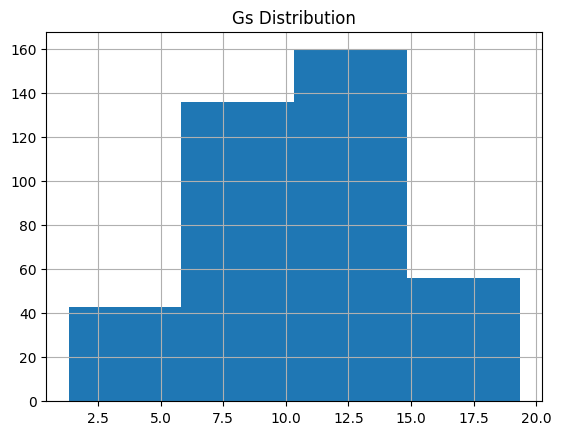

In [27]:
G_mean = ((df['G1'] + df['G2'] + df['G3']) / 3)
G_mean.hist(bins=4)
print(G_mean[:5])
plt.title('Gs Distribution')

In [28]:
above_q3 = df['G3'] >= df['G3'].quantile(0.75)
below_q1 = df['G3'] <= df['G3'].quantile(0.25)

In [29]:
print(df[above_q3].shape, df[below_q1].shape)
print(df[above_q3]['G3'].mean(), df[below_q1]['G3'].mean())


(100, 33) (102, 33)
15.62 4.392156862745098


In [30]:
above_q3.info()

<class 'pandas.core.series.Series'>
RangeIndex: 395 entries, 0 to 394
Series name: G3
Non-Null Count  Dtype
--------------  -----
395 non-null    bool 
dtypes: bool(1)
memory usage: 527.0 bytes


In [31]:
df[df['G3'] >= df['G3'].quantile(0.75)].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,15,15,15
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,16,18,19
9,0,1,15,1,0,1,3,4,2,2,...,5,5,1,1,1,5,0,14,15,15
12,0,1,15,1,1,1,4,4,1,3,...,4,3,3,1,3,5,2,14,14,14


In [32]:
df[df['G3'] <= df['G3'].quantile(0.25)].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,6,6,5,6
18,0,1,17,1,0,1,3,2,3,3,...,5,5,5,2,4,5,16,6,5,5
24,0,0,15,0,0,1,2,4,3,1,...,4,3,2,1,1,5,2,10,9,8


In [33]:
stupid_n_genius = pd.concat([df[df['G3'] >= df['G3'].quantile(0.75)], df[df['G3'] <= df['G3'].quantile(0.25)]])

In [34]:
stupid_n_genius

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,15,15,15
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,16,18,19
9,0,1,15,1,0,1,3,4,2,2,...,5,5,1,1,1,5,0,14,15,15
12,0,1,15,1,1,1,4,4,1,3,...,4,3,3,1,3,5,2,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,1,0,18,0,0,1,4,4,4,0,...,4,4,3,2,2,5,7,6,5,6
387,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,0,7,5,0
388,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,0,7,9,8
389,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,0,6,5,0


In [35]:
stupid_n_genius['sex'].dtype

dtype('int64')

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: 

FileNotFoundError: [Errno 2] No such file or directory: '../data/processed/corr_stupid_n_genius_1.png'

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Playdata\anaconda3\e

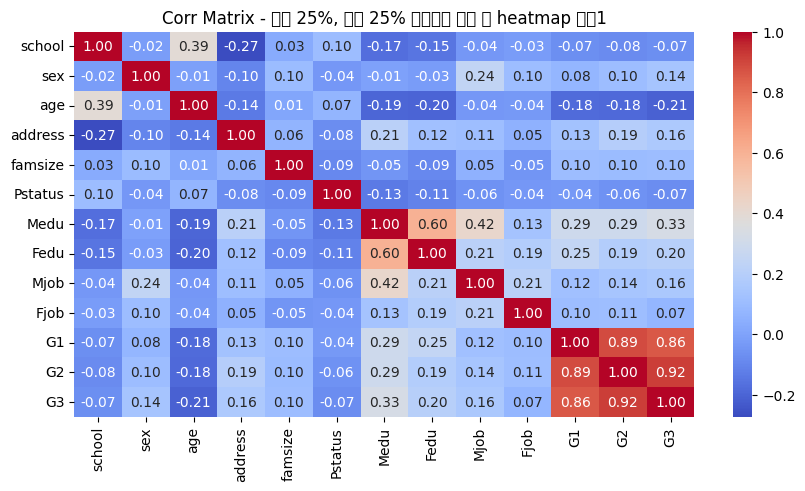

In [36]:
selected_cols = stupid_n_genius.columns[:10].tolist() + stupid_n_genius.columns[-3:].tolist()
corr_matrix = stupid_n_genius[selected_cols].corr()

plt.figure(figsize=(10,5))
plt.title('Corr Matrix - 상위 25%, 하위 25% 학생들만 합친 후 heatmap 뽑음1')
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.savefig('../data/processed/corr_stupid_n_genius_1.png')
plt.show()

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: 

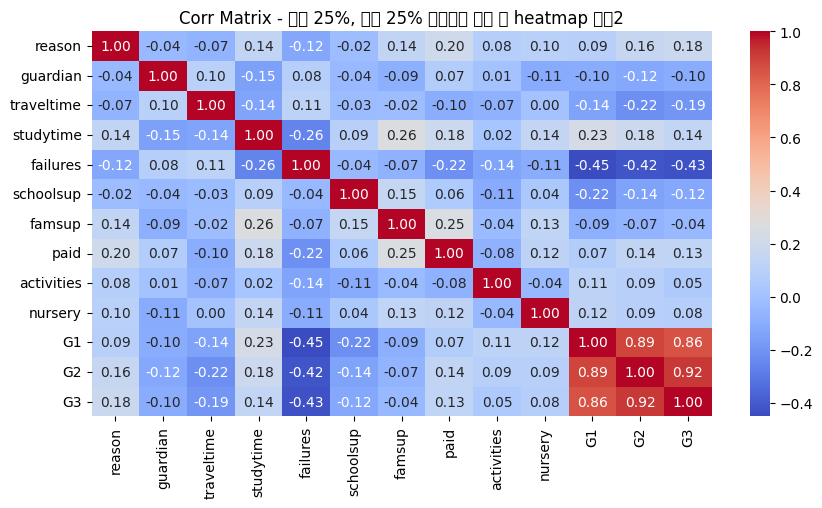

In [ ]:
selected_cols = stupid_n_genius.columns[10:20].tolist() + stupid_n_genius.columns[-3:].tolist()
corr_matrix = stupid_n_genius[selected_cols].corr()

plt.figure(figsize=(10,5))
plt.title('Corr Matrix - 상위 25%, 하위 25% 학생들만 합친 후 heatmap 뽑음2')
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.savefig('../data/processed/corr_stupid_n_genius_2.png')
plt.show()

c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\seaborn\utils.py:61: 

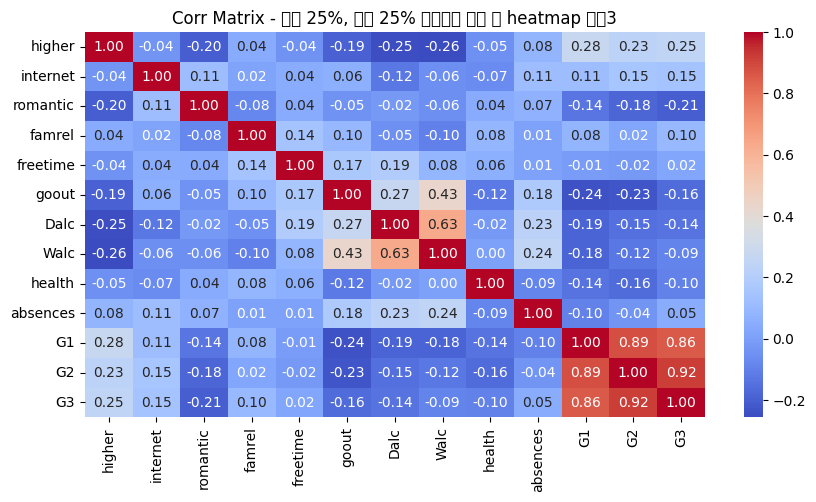

In [ ]:
selected_cols = stupid_n_genius.columns[20:30].tolist() + stupid_n_genius.columns[-3:].tolist()
corr_matrix = stupid_n_genius[selected_cols].corr()

plt.figure(figsize=(10,5))
plt.title('Corr Matrix - 상위 25%, 하위 25% 학생들만 합친 후 heatmap 뽑음3')
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.savefig('../data/processed/corr_stupid_n_genius_3.png')
plt.show()

### heatmap (scaling한 후)

In [ ]:
# scaling 하기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# boolean 빼고 스케일링


scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

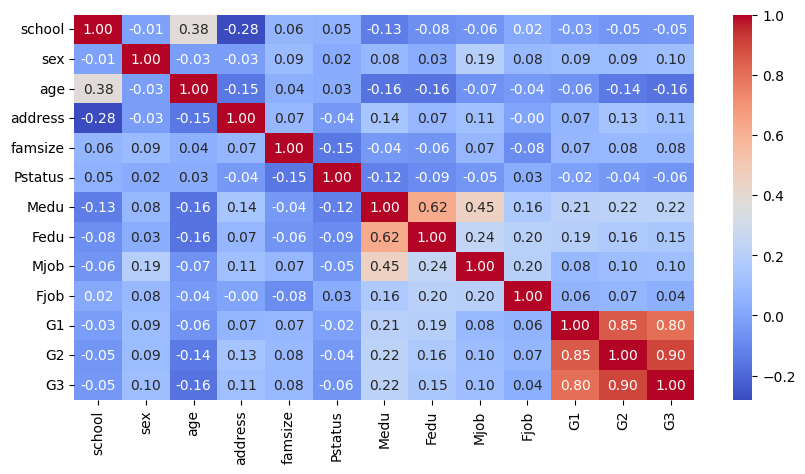

In [ ]:
# scaling된 데이터로 heatmap 다시 그리기
selected_cols = scaled_df.columns[:10].tolist() + stupid_n_genius.columns[-3:].tolist()
corr_matrix = scaled_df[selected_cols].corr()
    
plt.figure(figsize=(10,5))
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

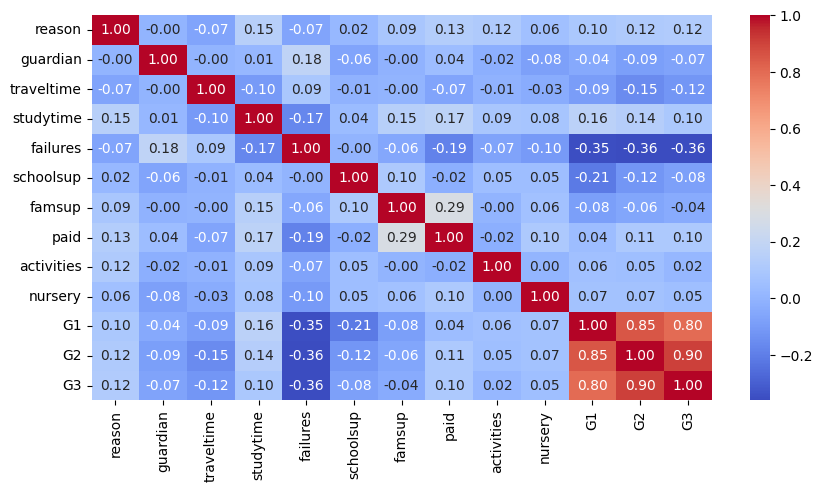

In [ ]:
selected_cols = scaled_df.columns[10:20].tolist() + stupid_n_genius.columns[-3:].tolist()
corr_matrix = scaled_df[selected_cols].corr()
    
plt.figure(figsize=(10,5))
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

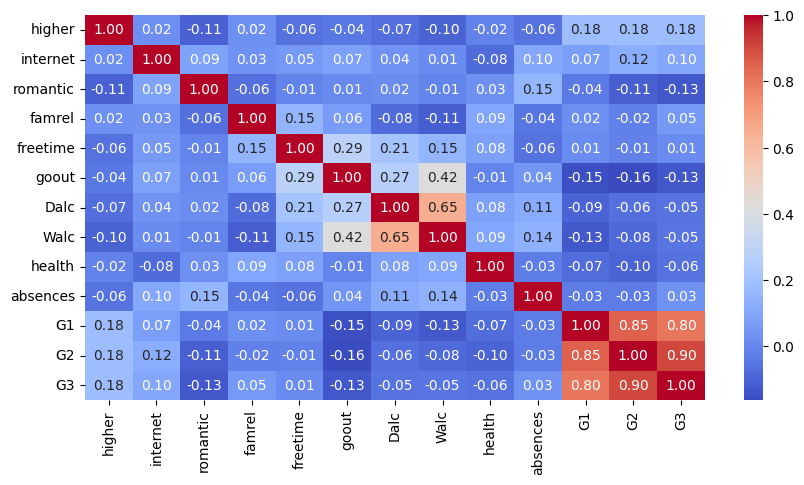

In [ ]:
selected_cols = scaled_df.columns[20:].tolist()
corr_matrix = scaled_df[selected_cols].corr()
    
plt.figure(figsize=(10,5))
sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

### 상위 25%, 하위 25%끼리 비교

In [ ]:
temp1 =scaled_df[scaled_df['G3'] >= scaled_df['G3'].quantile(0.75)] # 상위 25%
temp2 = scaled_df[scaled_df['G3'] <= scaled_df['G3'].quantile(0.25)] # 하위 25%

scaled_stupid_n_genius = pd.concat([temp1, temp2])

scaled_stupid_n_genius.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,...,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004
5,-0.36305,1.054656,-0.546287,0.535392,1.570004,0.340322,1.143856,0.440257,0.677354,-0.325831,...,1.178860,0.766399,-0.997295,-0.540699,-0.226345,1.041070,0.536865,1.234133,1.140903,1.002004
8,-0.36305,1.054656,-1.330954,0.535392,1.570004,-2.938392,0.229234,-0.479857,0.677354,-0.325831,...,0.062194,-1.238419,-0.997295,-0.540699,-1.003789,-1.839649,-0.714236,1.535793,1.939468,1.876199


<Axes: >

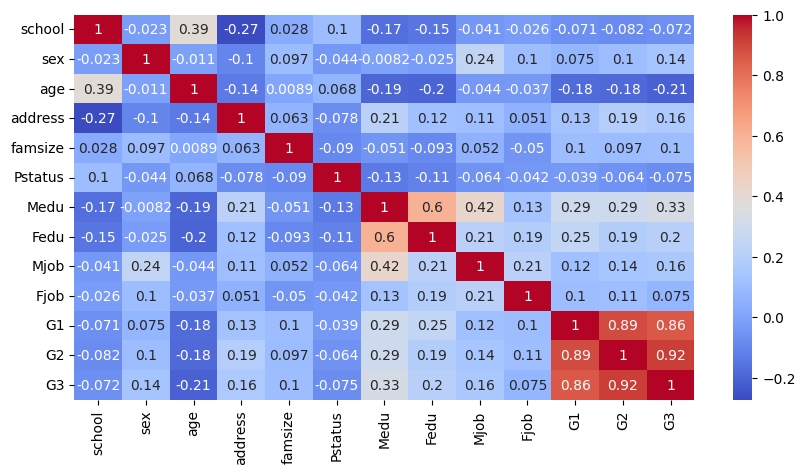

In [ ]:
selected_cols = scaled_stupid_n_genius.columns[:10].tolist() + scaled_stupid_n_genius.columns[-3:].tolist()
corr_matrix = scaled_stupid_n_genius[selected_cols].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: >

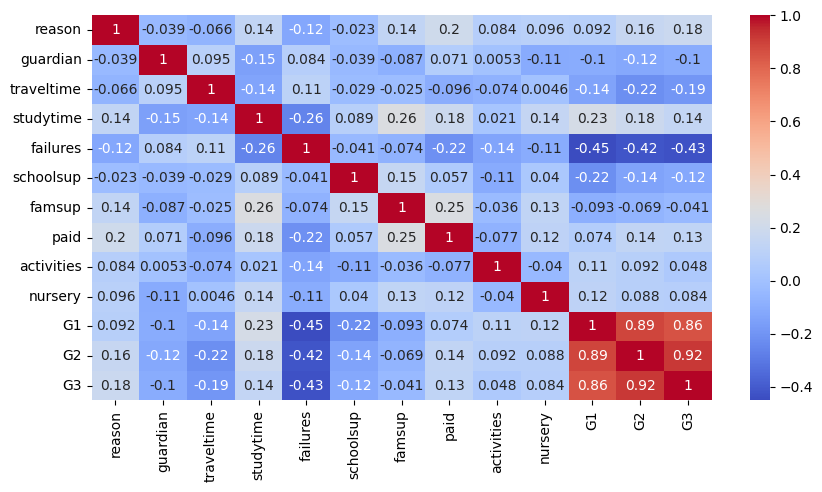

In [ ]:
selected_cols = scaled_stupid_n_genius.columns[10:20].tolist() + scaled_stupid_n_genius.columns[-3:].tolist()
corr_matrix = scaled_stupid_n_genius[selected_cols].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

3    1.411533
5   -0.708450
8   -0.708450
Name: romantic, dtype: float64

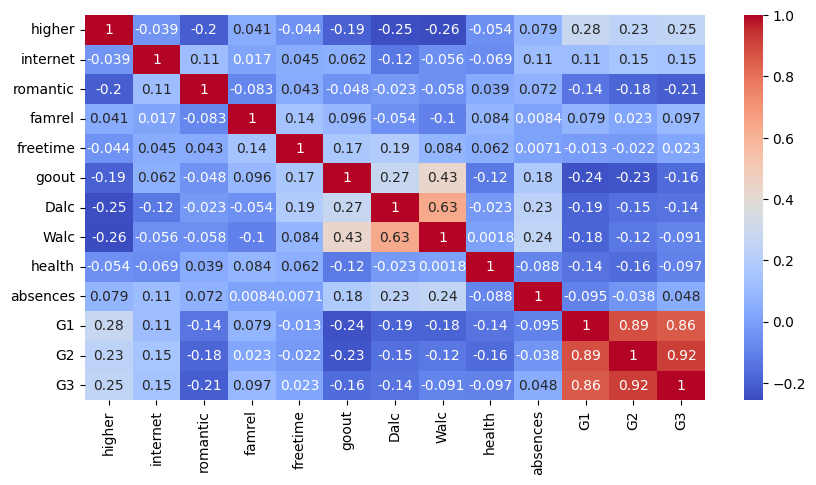

In [ ]:
selected_cols = scaled_stupid_n_genius.columns[20:].tolist()
corr_matrix = scaled_stupid_n_genius[selected_cols].corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
scaled_stupid_n_genius['romantic'].head(3)

In [ ]:
# romantic을 반대로 만들기
scaled_stupid_n_genius['romantic'] = 1 - scaled_stupid_n_genius['romantic']
scaled_stupid_n_genius.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,...,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004
5,-0.36305,1.054656,-0.546287,0.535392,1.570004,0.340322,1.143856,0.440257,0.677354,-0.325831,...,1.178860,0.766399,-0.997295,-0.540699,-0.226345,1.041070,0.536865,1.234133,1.140903,1.002004
8,-0.36305,1.054656,-1.330954,0.535392,1.570004,-2.938392,0.229234,-0.479857,0.677354,-0.325831,...,0.062194,-1.238419,-0.997295,-0.540699,-1.003789,-1.839649,-0.714236,1.535793,1.939468,1.876199


In [ ]:
df[df['G2'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
130,0,0,15,0,0,1,3,4,3,4,...,4,2,2,2,2,5,0,12,0,0
131,0,0,15,1,0,1,1,1,0,2,...,4,3,3,1,2,4,0,8,0,0
134,0,1,15,0,0,1,3,4,0,4,...,5,3,3,1,1,5,0,9,0,0
135,0,0,15,1,0,1,4,4,3,0,...,4,3,3,1,1,5,0,11,0,0
136,0,1,17,0,0,1,3,4,0,2,...,5,4,5,2,4,5,0,10,0,0
137,0,0,16,1,0,0,3,3,2,2,...,4,3,2,1,1,5,0,4,0,0
144,0,1,17,1,0,1,2,1,2,2,...,5,4,5,1,2,5,0,5,0,0
153,0,1,19,1,0,1,3,2,3,0,...,4,5,4,1,1,4,0,5,0,0
162,0,1,16,1,1,1,1,2,2,2,...,4,4,4,2,4,5,0,7,0,0
242,0,1,16,1,1,1,4,3,4,2,...,5,4,5,1,1,3,0,6,0,0


In [ ]:
df[df['G3'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
128,0,1,18,0,0,1,2,2,3,2,...,3,3,3,1,2,4,0,7,4,0
130,0,0,15,0,0,1,3,4,3,4,...,4,2,2,2,2,5,0,12,0,0
131,0,0,15,1,0,1,1,1,0,2,...,4,3,3,1,2,4,0,8,0,0
134,0,1,15,0,0,1,3,4,0,4,...,5,3,3,1,1,5,0,9,0,0
135,0,0,15,1,0,1,4,4,3,0,...,4,3,3,1,1,5,0,11,0,0
136,0,1,17,0,0,1,3,4,0,2,...,5,4,5,2,4,5,0,10,0,0
137,0,0,16,1,0,0,3,3,2,2,...,4,3,2,1,1,5,0,4,0,0
140,0,1,15,1,0,1,4,3,4,3,...,2,2,2,1,1,3,0,7,9,0
144,0,1,17,1,0,1,2,1,2,2,...,5,4,5,1,2,5,0,5,0,0
146,0,0,15,1,0,1,3,2,1,3,...,3,3,2,1,1,3,0,6,7,0


In [ ]:
print(len(df[df['failures'] == 1]))
df[df['failures'] == 1].head(5)

50


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,0,0,16,1,1,1,2,2,2,2,...,3,3,3,1,2,3,25,7,10,11
44,0,0,16,1,1,1,2,2,2,0,...,4,3,3,2,2,5,14,10,10,9
49,0,0,15,1,0,1,4,4,3,4,...,4,4,4,1,1,3,2,7,7,7
52,0,1,15,1,1,0,4,2,1,1,...,5,5,5,3,4,5,6,11,11,10
88,0,1,16,1,0,1,2,2,3,2,...,4,4,2,1,1,3,12,11,10,10
